In [6]:
#we will need to convert the date format into an applicable format since it's in fraction

from datetime import datetime, timedelta

def fractional_year_to_date(fractional_year):
    year = int(fractional_year)
    days = round((fractional_year - year) * 365)
    date = datetime(year, 1, 1) + timedelta(days=days)
    return date

# Apply the conversion function
estate_data['X1 transaction date'] = estate_data['X1 transaction date'].apply(fractional_year_to_date)
estate_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013-08-02,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
#to check for outliers in the dataset, we will drop the "No" and "X1 transaction date" columns and name the remaining columns "features"

features = estate_data.drop(columns=['X1 transaction date', 'No'])

In [12]:
#let's check for outliers in our dataset using the z score, then remove the rows with the outliers
from scipy.stats import zscore

# Using Z-score for outlier detection
from scipy.stats import zscore

z_scores = features.apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)

# Filter rows without outliers
clean_data = estate_data[~outliers]

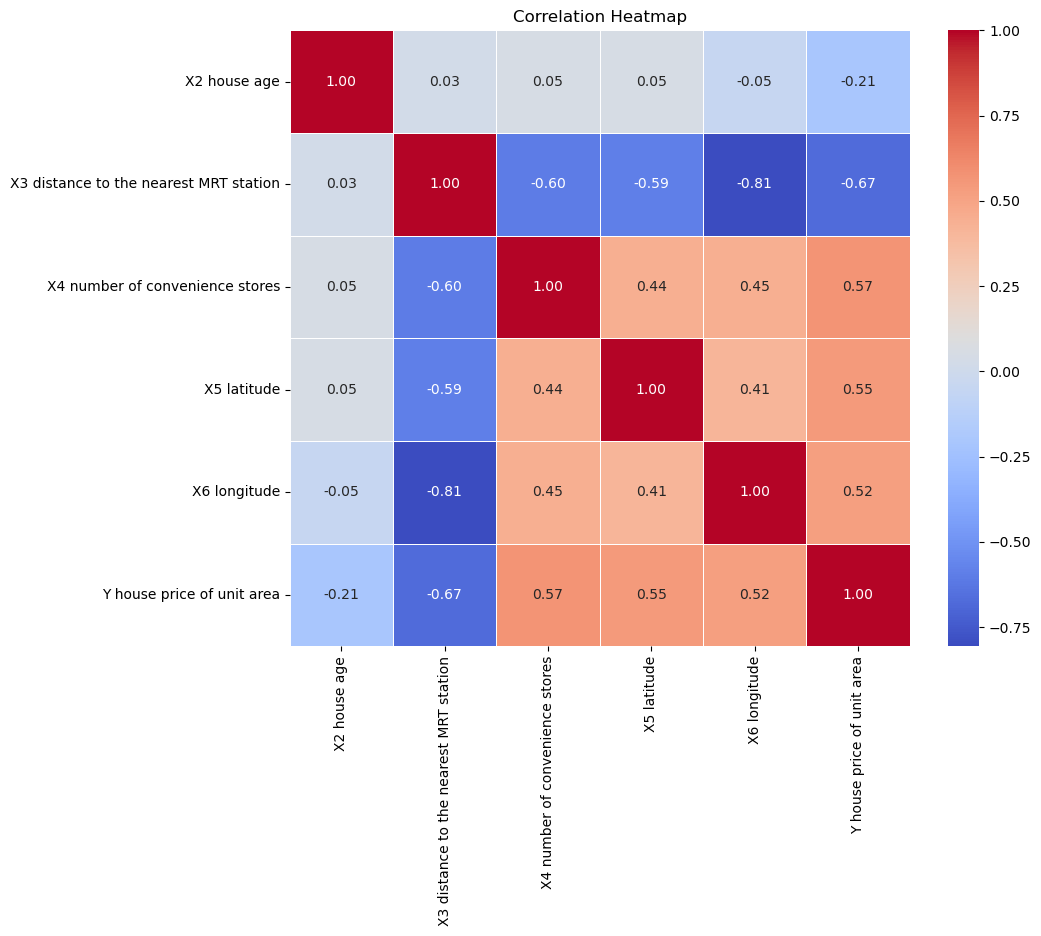

In [14]:
#let's now check for high correlation in the columns

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = features.corr()

# Set up the plot size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Display the correlation coefficients
    fmt=".2f",   # Format the annotations to 2 decimal places
    cmap="coolwarm",  # Use a visually appealing color map
    linewidths=0.5  # Add lines between cells for clarity
)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [ ]:
#our dataset has no high positive correlations, so we will be keeping all the columns

In [16]:
#let's check for skewness in the columns

import pandas as pd
from scipy.stats import skew

# Check skewness for each column
skewness = features.apply(lambda x: skew(x), axis=0)
print(skewness)

X2 house age                              0.381537
X3 distance to the nearest MRT station    1.881906
X4 number of convenience stores           0.154046
X5 latitude                              -0.437008
X6 longitude                             -1.215168
Y house price of unit area                0.597677
dtype: float64


In [18]:
#distance to the nearest MRT station is highly positively skewed and longitude is highly negatively skewed
#house price of unit area is also moderately skewed, so we will have to transform  it
#we will apply some transformations to both to reduce the skewness
#Random Forest benefits from less extreme distributions for splitting decisions

features.loc[:, 'X3 distance to the nearest MRT station'] = np.log1p(features['X3 distance to the nearest MRT station'])
features.loc[:, 'X6 longitude'] = np.sqrt(features['X6 longitude'].max() - features['X6 longitude'])
features.loc[:, 'Y house price of unit area'] = np.log1p(features['Y house price of unit area'])

In [20]:
features.apply(lambda x: skew(x), axis=0)

X2 house age                              0.381537
X3 distance to the nearest MRT station    0.060399
X4 number of convenience stores           0.154046
X5 latitude                              -0.437008
X6 longitude                              0.363165
Y house price of unit area               -0.662425
dtype: float64

In [ ]:
#skewness now looking good
#even though house price of unit area is moderately negatively skewed, we will not have to transform it further
#this is because Random Forest can handle negative skew well